(50000, 32, 32, 3)

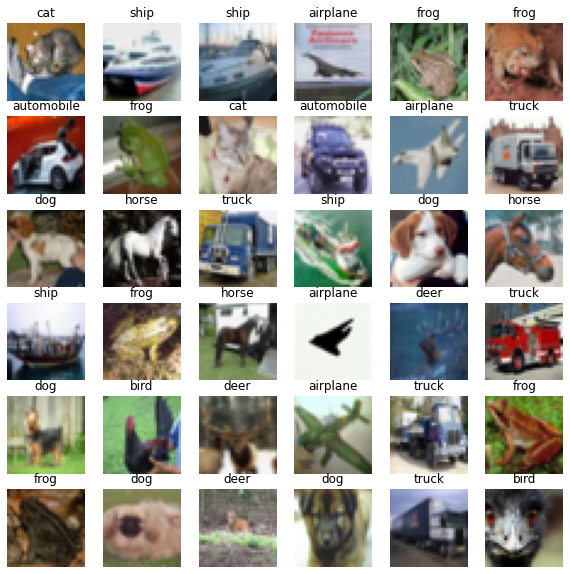

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainY = np_utils.to_categorical(trainY, len(class_names))
testY = np_utils.to_categorical(testY, len(class_names))

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(testX[i])
    plt.title(class_names[np.argmax(testY[i])]) 
    plt.axis("off")
    
trainX.shape

In [2]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = keras.models.Sequential()
model.add(Conv2D(32, 3, strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3686528   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,688,714
Trainable params: 3,688,714
Non-trainable params: 0
______________________________________________

In [3]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

hist = model.fit(trainX, 
                trainY, 
                batch_size=128, 
                epochs=10, 
                validation_data=(testX, testY),
                verbose=1)

Epoch 1/10
391/391 [==============================] - 91s 230ms/step - loss: 1.6172 - accuracy: 0.4307 - val_loss: 1.3672 - val_accuracy: 0.5087
Epoch 2/10
391/391 [==============================] - 87s 222ms/step - loss: 1.2592 - accuracy: 0.5569 - val_loss: 1.2614 - val_accuracy: 0.5538
Epoch 3/10
391/391 [==============================] - 87s 223ms/step - loss: 1.1276 - accuracy: 0.6042 - val_loss: 1.2070 - val_accuracy: 0.5785
Epoch 4/10
391/391 [==============================] - 87s 223ms/step - loss: 1.0285 - accuracy: 0.6397 - val_loss: 1.1656 - val_accuracy: 0.5919
Epoch 5/10
391/391 [==============================] - 88s 225ms/step - loss: 0.9512 - accuracy: 0.6700 - val_loss: 1.1804 - val_accuracy: 0.5937
Epoch 6/10
391/391 [==============================] - 87s 223ms/step - loss: 0.8648 - accuracy: 0.6993 - val_loss: 1.1267 - val_accuracy: 0.6111
Epoch 7/10
391/391 [==============================] - 88s 224ms/step - loss: 0.7954 - accuracy: 0.7236 - val_loss: 1.1630 - val_ac

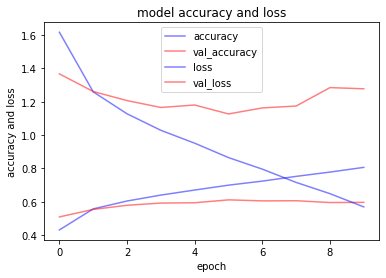

In [4]:
plt.plot(hist.history['accuracy'], 'b', alpha = 0.5, label = 'accuracy')
plt.plot(hist.history['val_accuracy'], 'r', alpha = 0.5, label = 'val_accuracy')
plt.plot(hist.history['loss'], 'b', alpha = 0.5,  label = 'loss')
plt.plot(hist.history['val_loss'], 'r', alpha = 0.5,  label = 'val_loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [5]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))

# model.save('cifar10_model.h5')

Test loss: 1.28
Test accuracy: 0.6


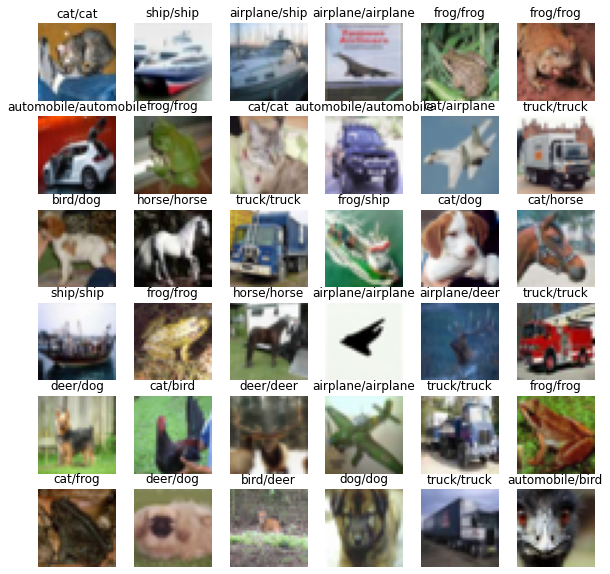

In [6]:
from tensorflow import keras

# model = keras.models.load_model('cifar10_model.h5')
predictions = model.predict(testX)

plt.figure(figsize=(10, 10))
for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(testX[i])
    plt.title(class_names[np.argmax(predictions[i])]+'/'+class_names[np.argmax(testY[i])])
    plt.axis("off") 